# COMPSCI 753 Assignment 4

- UPI: shi995
- Name: Wennan Shi
- Student ID: 967146402

## Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from joblib import Parallel, delayed

In [3]:
# Set random seed
RANDOM_STATE = 999
np.random.seed(RANDOM_STATE)

## Load the dataset

In [4]:
df_train = pd.read_json('train.json', lines=True)
df_train

,review_id,business_id,user_id,stars,date
0,xW294l3Lwh0cxlHU1jwRDA,na4Th5DrNauOv-c43QQFvA,nkN_do3fJ9xekchVC-v68A,5,2004-10-19 02:46:40
1,VgBxQqaDgOHq9YRxtMUm3A,6xgcHeLad-VaoTIQewK84A,G5LXEaxhQMF_BVjNHkVr7g,5,2005-04-27 23:38:05
2,lgpSS6UsKYIvnQaw8JwHlQ,--9e1ONYQuAa-CB_Rrw7Tw,G5LXEaxhQMF_BVjNHkVr7g,5,2005-04-27 23:38:49
3,xKf_Y6PmebgJtFLULpYCzA,Wxxvi3LZbHNIDwJ-ZimtnA,G5LXEaxhQMF_BVjNHkVr7g,5,2005-04-27 23:44:33
4,9P9aP_laBPpHWbdY9ZZYyA,BjH8Xepc10i6OhCDQdX6og,nzsv-p1O8gCfP3XijfQrIw,4,2005-04-28 04:42:38
...,...,...,...,...,...
841015,yyYrzyO8aGs7Utx6v8sq2A,jxbEwtV8Et1lm8ubk4AGuw,SXlY8VExSxcKcvlwSVHQ3Q,4,2019-10-01 16:35:09
841016,uPKOTU73W4yrX4sG4TX4Mg,TbIVXylgp6UsfSPI9PYddA,dPgVG1nGSUONC0IViu5Phg,3,2019-10-01 16:54:15
841017,L9Ub4BK_QH-y9ezC9Ekxgg,gSR9bmBa0HacSuMX5BIAxg,WhrQp8fwIII7TbnZWCSTxg,1,2019-10-01 17:16:48
841018,FCpy5iCZOsxQnY-UEOl70g,V7LKpzlKQz1hrceZExU-pQ,_2Sa7pq5z2XOUhS9DOCGHw,5,2019-10-01 17:28:24


In [5]:
df_val = pd.read_json('val.json', lines=True)
df_val

,review_id,business_id,user_id,stars,date
0,lezuf8CCqwIhuFKuODJQ4Q,TyuFl3J4fUDB573AHu5uBQ,1nDMoT9DVNqEpdQHx58_Fg,5,2019-10-01 17:31:21
1,q7DYlMJG2JD0JPUYMhGI1Q,eSILD9dtyDApgcL5Lwxu9Q,o_y7a6cX9rFwRP0Mu2bhrg,5,2019-10-01 17:31:45
2,9skpkCsrLfuzEaPYvF96iQ,kJl3l4fSa2spv_Mkhgogmg,EOSdJO9YY4g3GL0Hwj093g,1,2019-10-01 17:36:10
3,acAChnnwLZj47dFEZtrfVA,xK3SuX2yYyx1syvWtToqBw,oagZh5A2cWJXZBLakS_KpQ,5,2019-10-01 17:41:47
4,EjvWKha8tUz4Sbi4RshfpQ,ICWRXA2TXYYoAfLibm7Myw,wdJgF0wnDqMjGsv2Js6paw,5,2019-10-01 17:43:30
...,...,...,...,...,...
8577,qAxCqAGjoDKNc7Pt7JERwA,Tefx_N6A6nrsdj4jHHnbYg,TGSi0e7-ovol_PBIQgodOg,4,2019-11-06 00:11:53
8578,JLNmvgbV-63pqtM6RxoFAw,2sx52lDoiEtef7xgPCaoBw,L8cvMZLWmM4qWTl9SkxJ8g,5,2019-11-06 00:20:23
8579,bJ_TOpBIfGHhiT3KsrmoDQ,NKh691Q7BZZ2r0f2RJxdsg,TGSi0e7-ovol_PBIQgodOg,1,2019-11-06 00:21:20
8580,3evGPsDPeKk4SYvyrXabwA,cn6Lguvd8T2pWq4-WNLHpQ,iPceDCz6O2__AZK00w4gQw,4,2019-11-06 00:24:22


In [6]:
df_test = pd.read_json('test.json', lines=True)
df_test

,review_id,business_id,user_id,stars,date
0,fxZAZLE2jPB2ZzN2YWOFgA,Yo8NIJEtc8UEbPd38L35ow,0tvCcnfJnSs55iB6mqPk3w,3,2019-11-06 00:57:32
1,SmKIRnFSd83xh9bCIpYvbw,2sx52lDoiEtef7xgPCaoBw,2MtL65B0hy5L41TFBRIdYg,5,2019-11-06 01:00:03
2,6Cjn4STvzl0kldW5lgpZXw,J3FUxMAHfCl-WFo86u5DqA,0911xXCgLexupPGkDJusLQ,5,2019-11-06 01:04:23
3,Bwg6TawW4ItRLzyirF0S4A,fWetLvfQXqpZcBQLHldUhA,augJQotyLB503iq1gVJ_tg,4,2019-11-06 01:09:45
4,ZT-uT0RHY_h3nhT9v-64JQ,bTzahgWasnfRM5hzCg0XQw,HfSzj04v8zU6kOFr71_ufg,5,2019-11-06 01:17:54
...,...,...,...,...,...
8577,FiPbA0hoFvmEKNWX2D7vEg,L79b_FccWEKr-lON9tx5-g,TG077RFpEVEi8mMZ38GnYQ,5,2019-12-13 13:40:08
8578,nmAAhMGwq_QyT69YaZTHPw,zelX9HDxrnS-_LcvVy82cA,2WFckFVE5ARdYrLzwg-koA,2,2019-12-13 14:12:42
8579,Gr0ax0gA6h4z5-lPyug3Jw,R8MlQBl08OICEJOvwsw25g,dEB3Q2_L3q_bPrslU2koIw,5,2019-12-13 14:37:28
8580,bwswkgcVgsv_IPzqMdA4ow,xfWdUmrz2ha3rcigyITV0g,iW6YSCu3YVI-SNPNi0I-xg,5,2019-12-13 14:45:29


## Task 1

Estimate the global bias $b_g$, user specific bias $b^{(user)}_{i}$ and item specific bias $b^{(item)}_{j}$ on the **training data**.

In [7]:
bg = df_train.stars.sum()/len(df_train.stars)
print("The global bias is:", bg)
user_specific_stars = df_train.loc[df_train.user_id == "b4aIMeXOx4cn3bjtdIOo6Q"].stars
b_user = user_specific_stars.sum()/len(user_specific_stars)-bg
print("The user specific bias is:", b_user)
item_specific_stars = df_train.loc[df_train.business_id == "7VQYoXk3Tc8EZeKuXeixeg"].stars
b_item = item_specific_stars.sum()/len(item_specific_stars)-bg
print("The item specific bias is:", b_item)

The global bias is: 3.8290028774583242
The user specific bias is: -0.4605818248267455
The item specific bias is: -0.05122509968054656


Note: Estimating the biases for all users and items on the training data will be done at Task 4.

## Task 2

Implement the basic latent factor model without considering the bias: $r_{ij} = q^{T}_ip_j$.

In [8]:
# SGD Optimizer for Latent Factor Model
def SGD_for_LFM(R, k, eta, epochs, lambda_1, lambda_2):
    # Initialize user and item profile vectors
    Q = np.random.normal(0, 0.2, (R.shape[0],k))      #train user 41657
    P = np.random.normal(0, 0.2, (R.shape[1],k)).T    #train item 7954
    RMSE_List = []
    for epoch in range(epochs):
        SSE = 0
        count = 0
        # For each rating of user i, item j
        for i, j in zip(R.nonzero()[0], R.nonzero()[1]):
            # Calculate current error
            error = R[i,j] - np.dot(Q[i,:], P[:,j])
            # Update for the f-th factor
            for f in range(k):
                Q[i,f] -= eta * (-2 * error * P[f,j] + 2 * lambda_1 * Q[i,f])
                P[f,j] -= eta * (-2 * error * Q[i,f] + 2 * lambda_2 * P[f,j])
            # Update the error
            update_error = R[i,j] - np.dot(Q[i,:], P[:,j])
            # Calculate SSE
            SSE += np.square(update_error)
            count += 1
        # Calculate RMSE
        RMSE = np.sqrt(SSE / count)
        RMSE_List.append(RMSE)
    return Q, P, RMSE_List

In [9]:
# Convert training set to sparse matrix
pivot_table = pd.pivot_table(df_train, values='stars', index='user_id', columns='business_id', fill_value=0)
R = lil_matrix(pivot_table.values)
R.shape

(41657, 7954)

In [10]:
# Use SGD to train the latent factor model
SGD_for_LFM_results = Parallel(n_jobs = -1)(delayed(SGD_for_LFM)(R, k,
                      eta=0.01, epochs=10, lambda_1=0.3, lambda_2=0.3) for k in [4,8,16])

In [11]:
# R_hat = Q.dot(P)
R_hat_k4 = SGD_for_LFM_results[0][0].dot(SGD_for_LFM_results[0][1])
R_hat_k8 = SGD_for_LFM_results[1][0].dot(SGD_for_LFM_results[1][1])
R_hat_k16 = SGD_for_LFM_results[2][0].dot(SGD_for_LFM_results[2][1])
RMSE_k8 = SGD_for_LFM_results[1][2]
RMSE_k8

[2.8539425066518604,
 1.4145474210470115,
 1.071321459564732,
 1.0283522672275105,
 1.016809299637798,
 1.0115752789305814,
 1.0084159538344568,
 1.0061627098094224,
 1.0043585741852445,
 1.0027819337562456]

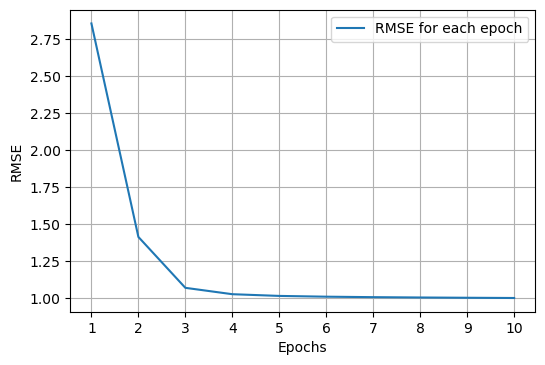

In [12]:
plt.figure(dpi=100)
x = np.arange(1,11)
y = RMSE_k8
plt.plot(x, y, label='RMSE for each epoch')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()
plt.show()

From the above results, it can be seen that when k = 8, as the number of epochs increases, the RMSE decreases. Especially when epoch <= 3, the RMSE drops rapidly, then gradually becomes stable.

## Task 3

Use SGD to train the latent factor model with different values of k in {4, 8, 16} and stop after 10 epoches.

### 3.1 Combine all training results into one table

In [13]:
# Revert pivot table to regular data frame
pivot_table_copy = pivot_table.copy(deep=True)
pivot_table_copy.columns.name = None
pivot_table_copy = pivot_table_copy.reset_index()
df_predict = pd.melt(pivot_table_copy, id_vars='user_id', var_name='business_id', value_name='stars')
# Add all training results as columns
df_predict['predict_k4'] = R_hat_k4.T.reshape(-1)
df_predict['predict_k8'] = R_hat_k8.T.reshape(-1)
df_predict['predict_k16'] = R_hat_k16.T.reshape(-1)
df_predict

,user_id,business_id,stars,predict_k4,predict_k8,predict_k16
0,---1lKK3aKOuomHnwAkAow,--9e1ONYQuAa-CB_Rrw7Tw,4,3.653991,3.644876,3.636833
1,--0kuuLmuYBe3Rmu0Iycww,--9e1ONYQuAa-CB_Rrw7Tw,0,3.070060,3.044872,2.879085
2,--2vR0DIsmQ6WfcSzKWigw,--9e1ONYQuAa-CB_Rrw7Tw,0,4.361312,4.360798,4.362140
3,--CIuK7sUpaNzalLAlHJKA,--9e1ONYQuAa-CB_Rrw7Tw,0,2.929918,2.935240,2.926201
4,--HCoE1ghaAlcaAfshICgw,--9e1ONYQuAa-CB_Rrw7Tw,0,5.022018,5.033933,4.870852
...,...,...,...,...,...,...
331339773,zzMJLd3cWBM6HT8eMbOGbA,zyrF7je6qVbaJMPfMG75xg,0,2.891427,2.833138,2.900444
331339774,zzPvEodjvLPe-5NvV0U_cg,zyrF7je6qVbaJMPfMG75xg,0,3.160802,3.130920,3.159317
331339775,zzRsxXA2tQNmWex66mdVhA,zyrF7je6qVbaJMPfMG75xg,0,1.985334,2.017596,2.051486
331339776,zzUlFuJ5HFNEm15o9YC9Qg,zyrF7je6qVbaJMPfMG75xg,0,3.750211,3.648006,3.687585


### 3.2 Merge training results with validation data

In [14]:
def merge_dataframe(df):
    df_merge = pd.merge(df, df_predict.drop(columns=['stars']), how='left', on=['user_id', 'business_id'])
    df_merge.drop(columns=['review_id', 'date'], inplace = True)
    return df_merge

In [15]:
def fill_nan(df_merge):
    # Take out the subset containing NaN values
    df_nan = df_merge[df_merge.predict_k4.isnull().values==True]
    # Check if user and business exist in the training set
    df_nan['user_in_train'] = df_nan.apply(lambda x: 'yes' if x.user_id in df_train.user_id.values else 'no', axis=1)
    df_nan['business_in_train'] = df_nan.apply(lambda x: 'yes' if x.business_id in df_train.business_id.values else 'no', axis=1)
    # Calculate and fill missing stars
    for b, u, u_in_train, b_in_train in zip(df_nan.business_id, df_nan.user_id, df_nan.user_in_train, df_nan.business_in_train):
        # If only business exist in the training set
        if (u_in_train == 'no') & (b_in_train == 'yes'):
            # Use the average of stars obtained by the business as the predicted value
            bstars = df_train.stars[df_train.business_id == b].sum() / len(df_train.stars[df_train.business_id == b])
            df_nan.predict_k4[(df_nan.user_id == u) & (df_nan.business_id == b)] = bstars
        # If only user exist in the training set
        elif (u_in_train == 'yes') & (b_in_train == 'no'):
            # Use the average of stars given by the user as the predicted value
            ustars = df_train.stars[df_train.user_id == u].sum() / len(df_train.stars[df_train.user_id == u])
            df_nan.predict_k4[(df_nan.user_id == u) & (df_nan.business_id == b)] = ustars
        # If neither exist in the training set
        elif (u_in_train == 'no') & (b_in_train == 'no'):
            # Use the average of all stars as the predicted value
            nstars = df_train.stars.sum() / len(df_train.stars)
            df_nan.predict_k4[(df_nan.user_id == u) & (df_nan.business_id == b)] = nstars
    # Same as k=8 or k=16
    df_nan.predict_k8 = df_nan.predict_k4
    df_nan.predict_k16 = df_nan.predict_k4
    df_nan.drop(columns=['user_in_train', 'business_in_train'], inplace=True)
    # Put the average predicted value in the subset back into the df_merge
    for i in df_nan.index:
        df_merge[df_merge.index == i] = df_nan[df_nan.index == i]
    return df_merge

In [16]:
df_val_predict = merge_dataframe(df_val)
# Check for NaN values
df_val_predict.isnull().sum()

business_id      0
user_id          0
stars            0
predict_k4     388
predict_k8     388
predict_k16    388
dtype: int64

In the validation data, some users and businesses do not appear in the training data. For only user but no business, we use the average stars of this user as the prediction; for only  business but no user, we use the average stars of this business as the prediction; for neither user nor business, we use the global average stars as the prediction.

In [17]:
df_val_predict = fill_nan(df_val_predict)
# Check for NaN values again
df_val_predict.isnull().sum()

business_id    0
user_id        0
stars          0
predict_k4     0
predict_k8     0
predict_k16    0
dtype: int64

In [18]:
df_val_predict

,business_id,user_id,stars,predict_k4,predict_k8,predict_k16
0,TyuFl3J4fUDB573AHu5uBQ,1nDMoT9DVNqEpdQHx58_Fg,5,3.810989,3.721780,3.817084
1,eSILD9dtyDApgcL5Lwxu9Q,o_y7a6cX9rFwRP0Mu2bhrg,5,3.920989,4.012485,3.914553
2,kJl3l4fSa2spv_Mkhgogmg,EOSdJO9YY4g3GL0Hwj093g,1,3.123490,3.161561,3.071073
3,xK3SuX2yYyx1syvWtToqBw,oagZh5A2cWJXZBLakS_KpQ,5,3.640813,3.963766,3.532960
4,ICWRXA2TXYYoAfLibm7Myw,wdJgF0wnDqMjGsv2Js6paw,5,3.858621,3.856142,3.734774
...,...,...,...,...,...,...
8577,Tefx_N6A6nrsdj4jHHnbYg,TGSi0e7-ovol_PBIQgodOg,4,4.120704,4.115353,4.123171
8578,2sx52lDoiEtef7xgPCaoBw,L8cvMZLWmM4qWTl9SkxJ8g,5,3.485563,3.482417,3.435552
8579,NKh691Q7BZZ2r0f2RJxdsg,TGSi0e7-ovol_PBIQgodOg,1,3.876019,3.862533,3.871840
8580,cn6Lguvd8T2pWq4-WNLHpQ,iPceDCz6O2__AZK00w4gQw,4,3.849654,3.858469,3.864957


### 3.3 Report the RMSE for each value of k on the validation data

In [19]:
# Calculate SSE
SSE_val_k4 = np.square(df_val_predict.stars - df_val_predict.predict_k4).sum()
SSE_val_k8 = np.square(df_val_predict.stars - df_val_predict.predict_k8).sum()
SSE_val_k16 = np.square(df_val_predict.stars - df_val_predict.predict_k16).sum()
# Calculate RMSE
RMSE_val_k4 = np.sqrt(SSE_val_k4 / 8582)
RMSE_val_k8 = np.sqrt(SSE_val_k8 / 8582)
RMSE_val_k16 = np.sqrt(SSE_val_k16 / 8582)
print("When k=4, the RMSE on the validation data is:", RMSE_val_k4)
print("When k=8, the RMSE on the validation data is:", RMSE_val_k8)
print("When k=16, the RMSE on the validation data is:", RMSE_val_k16)

When k=4, the RMSE on the validation data is: 1.306177059053072
When k=8, the RMSE on the validation data is: 1.307397277197805
When k=16, the RMSE on the validation data is: 1.3100329543845974


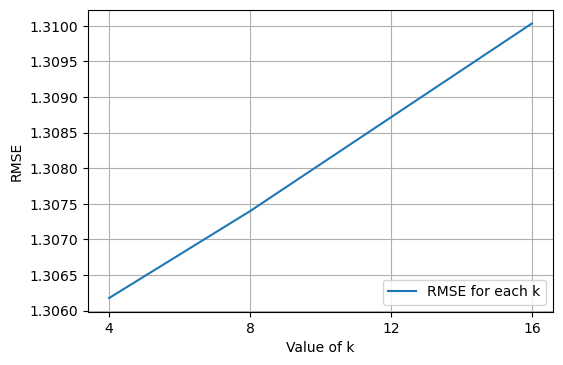

In [20]:
plt.figure(dpi=100)
x = [4, 8, 16]
y = [RMSE_val_k4, RMSE_val_k8, RMSE_val_k16]
plt.plot(x, y, label='RMSE for each k')
plt.legend(loc='lower right')
plt.xlabel('Value of k')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))
plt.grid()
plt.show()

From the above results, it can be seen that when k=4, the validation data has the smallest RMSE on the model, so we pick k=4 to apply to the test data.  
Note: In several experiments, it was found that due to the existence of randomness, sometimes k=8, the RMSE is the smallest, but most of the time, when k=4, the RMSE is the smallest. Therefore we still pick k=4 here.

### 3.4 Pick the best model and report its RMSE on the test data

In [21]:
df_test_predict = merge_dataframe(df_test)
# Check for NaN values
df_test_predict.isnull().sum()

business_id      0
user_id          0
stars            0
predict_k4     531
predict_k8     531
predict_k16    531
dtype: int64

Same as before, for test data, we use the average star as the prediction for users and businesses not appear in the training data.

In [22]:
df_test_predict = fill_nan(df_test_predict)
# Check for NaN values again
df_test_predict.isnull().sum()

business_id    0
user_id        0
stars          0
predict_k4     0
predict_k8     0
predict_k16    0
dtype: int64

In [23]:
# Calculate SSE
SSE_test_k4 = np.square(df_test_predict.stars - df_test_predict.predict_k4).sum()
# Calculate RMSE
RMSE_test_k4 = np.sqrt(SSE_test_k4 / 8582)
print("When k=4, the RMSE on the test data is:", RMSE_test_k4)

When k=4, the RMSE on the test data is: 1.286464109596187


## Task 4

Incorporate the bias terms $b_g$, $b^{(user)}_i$ and $b^{(item)}_j$ to the latent factor model: $r_{ij} = b_g + b^{(user)}_i + b^{(item)}_j + q^T_ip_j$ and learn the user bias and business bias from data.

In [24]:
# SGD Optimizer for Latent Factor Model
def SGD_for_LFM_with_bias(R, k, eta, epochs, lambda_1, lambda_2, lambda_3, lambda_4, bg, user_bias, item_bias):
    # Initialize user and item profile vectors
    Q = np.random.normal(0, 0.2, (R.shape[0],k))      #train user 41657
    P = np.random.normal(0, 0.2, (R.shape[1],k)).T    #train item 7954
    RMSE_List = []
    for epoch in range(epochs):
        SSE = 0
        count = 0
        # For each rating of user i, item j
        for i, j in zip(R.nonzero()[0], R.nonzero()[1]):
            # Get rating prediction
            r_hat = np.dot(Q[i,:], P[:,j]) + bg + user_bias[i] + item_bias[j]
            # Calculate current error
            error = R[i,j] - r_hat
            # Update for the f-th factor
            for f in range(k):
                Q[i,f] -= eta * (-2 * error * P[f,j] + 2 * lambda_1 * Q[i,f])
                P[f,j] -= eta * (-2 * error * Q[i,f] + 2 * lambda_2 * P[f,j])
            # Update the bias of user and business
            user_bias[i] -= eta * (-2 * error + 2 * lambda_3 * user_bias[i])
            item_bias[j] -= eta * (-2 * error + 2 * lambda_4 * item_bias[j])
            # Update the error
            update_error = R[i,j] - (np.dot(Q[i,:], P[:,j]) + bg + user_bias[i] + item_bias[j])
            # Calculate SSE
            SSE += np.square(update_error)
            count += 1
        # Calculate RMSE
        RMSE = np.sqrt(SSE / count)
        RMSE_List.append(RMSE)
    return Q, P, RMSE_List, user_bias, item_bias

In [25]:
# Calculate the bias of all users and businesses on the training data
user_bias = np.squeeze((R.sum(1) / (R!=0).sum(1) - bg).tolist())
item_bias = np.squeeze((R.sum(0) / (R!=0).sum(0) - bg).tolist())

In [26]:
# Use SGD to train the latent factor model with bias
SGD_for_LFM_with_bias_results = Parallel(n_jobs = -1)(delayed(SGD_for_LFM_with_bias)(R, k, eta=0.01, epochs=10,
                                lambda_1=0.3, lambda_2=0.3, lambda_3=0.3, lambda_4=0.3,
                                bg=bg, user_bias=user_bias, item_bias=item_bias) for k in [4,8,16])

In [27]:
new_user_bias = SGD_for_LFM_with_bias_results[1][3]
new_item_bias = SGD_for_LFM_with_bias_results[1][4]

In [28]:
# R_hat = Q.dot(P) + bg + bi + bj
R_hat_k4 = SGD_for_LFM_with_bias_results[0][0].dot(SGD_for_LFM_with_bias_results[0][1]) + bg + new_user_bias.reshape(41657,1) + item_bias
R_hat_k8 = SGD_for_LFM_with_bias_results[1][0].dot(SGD_for_LFM_with_bias_results[1][1]) + bg + new_user_bias.reshape(41657,1) + item_bias
R_hat_k16 = SGD_for_LFM_with_bias_results[2][0].dot(SGD_for_LFM_with_bias_results[2][1]) + bg + new_user_bias.reshape(41657,1) + item_bias
RMSE_k8 = SGD_for_LFM_with_bias_results[1][2]
RMSE_k8

[1.0448396491897736,
 1.0433355687564143,
 1.043391718008675,
 1.0435546126976727,
 1.0436822855793924,
 1.0437371451835356,
 1.0437068074240812,
 1.043587773414925,
 1.0433798990566645,
 1.0430841007268907]

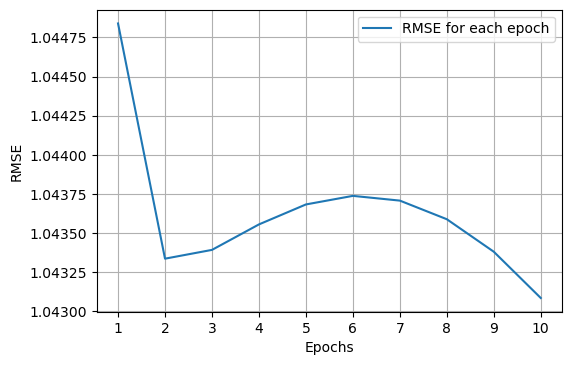

In [29]:
plt.figure(dpi=100)
x = np.arange(1,11)
y = RMSE_k8
plt.plot(x, y, label='RMSE for each epoch')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()
plt.show()

From the above results, it can be seen that when k = 8, as the number of epochs increases, the overall trend of RMSE is declining, although there is a slight rebound in the middle.

In [30]:
new_b_user = new_user_bias[np.argwhere(pivot_table.index == 'b4aIMeXOx4cn3bjtdIOo6Q')[0,0]]
new_b_item = new_item_bias[np.argwhere(pivot_table.columns == '7VQYoXk3Tc8EZeKuXeixeg')[0,0]]
print("The user specific bias is:", new_b_user)
print("The item specific bias is:", new_b_item)

The user specific bias is: -0.27123530778729
The item specific bias is: 0.04771831288192861


## Task 5

Similar to Task 3, find the best k for the model you developed in Task 4 on the validation set and apply the corresponding model to the test data.

### 5.1 Combine all training results into one table

In [31]:
# Revert pivot table to regular data frame
pivot_table_copy = pivot_table.copy(deep=True)
pivot_table_copy.columns.name = None
pivot_table_copy = pivot_table_copy.reset_index()
df_predict = pd.melt(pivot_table_copy, id_vars='user_id', var_name='business_id', value_name='stars')
# Add all training results as columns
df_predict['predict_k4'] = R_hat_k4.T.reshape(-1)
df_predict['predict_k8'] = R_hat_k8.T.reshape(-1)
df_predict['predict_k16'] = R_hat_k16.T.reshape(-1)
df_predict

,user_id,business_id,stars,predict_k4,predict_k8,predict_k16
0,---1lKK3aKOuomHnwAkAow,--9e1ONYQuAa-CB_Rrw7Tw,4,4.044712,4.044885,4.050767
1,--0kuuLmuYBe3Rmu0Iycww,--9e1ONYQuAa-CB_Rrw7Tw,0,3.434347,3.421216,3.422079
2,--2vR0DIsmQ6WfcSzKWigw,--9e1ONYQuAa-CB_Rrw7Tw,0,4.349434,4.345684,4.345304
3,--CIuK7sUpaNzalLAlHJKA,--9e1ONYQuAa-CB_Rrw7Tw,0,3.337425,3.326864,3.331043
4,--HCoE1ghaAlcaAfshICgw,--9e1ONYQuAa-CB_Rrw7Tw,0,4.849396,4.855454,4.840560
...,...,...,...,...,...,...
331339773,zzMJLd3cWBM6HT8eMbOGbA,zyrF7je6qVbaJMPfMG75xg,0,3.378241,3.397426,3.390343
331339774,zzPvEodjvLPe-5NvV0U_cg,zyrF7je6qVbaJMPfMG75xg,0,3.448164,3.454763,3.448457
331339775,zzRsxXA2tQNmWex66mdVhA,zyrF7je6qVbaJMPfMG75xg,0,2.593056,2.600677,2.570320
331339776,zzUlFuJ5HFNEm15o9YC9Qg,zyrF7je6qVbaJMPfMG75xg,0,4.005280,4.000238,4.061040


### 5.2 Merge training results with validation data

In [32]:
df_val_predict = merge_dataframe(df_val)
# Check for NaN values
df_val_predict.isnull().sum()

business_id      0
user_id          0
stars            0
predict_k4     388
predict_k8     388
predict_k16    388
dtype: int64

In [33]:
df_val_predict = fill_nan(df_val_predict)
# Check for NaN values again
df_val_predict.isnull().sum()

business_id    0
user_id        0
stars          0
predict_k4     0
predict_k8     0
predict_k16    0
dtype: int64

In [34]:
df_val_predict

,business_id,user_id,stars,predict_k4,predict_k8,predict_k16
0,TyuFl3J4fUDB573AHu5uBQ,1nDMoT9DVNqEpdQHx58_Fg,5,4.584361,4.588491,4.535885
1,eSILD9dtyDApgcL5Lwxu9Q,o_y7a6cX9rFwRP0Mu2bhrg,5,4.416105,4.413105,4.434323
2,kJl3l4fSa2spv_Mkhgogmg,EOSdJO9YY4g3GL0Hwj093g,1,3.506772,3.513517,3.494618
3,xK3SuX2yYyx1syvWtToqBw,oagZh5A2cWJXZBLakS_KpQ,5,3.828015,3.743550,3.816429
4,ICWRXA2TXYYoAfLibm7Myw,wdJgF0wnDqMjGsv2Js6paw,5,4.210880,4.225813,4.241965
...,...,...,...,...,...,...
8577,Tefx_N6A6nrsdj4jHHnbYg,TGSi0e7-ovol_PBIQgodOg,4,4.487319,4.489498,4.488169
8578,2sx52lDoiEtef7xgPCaoBw,L8cvMZLWmM4qWTl9SkxJ8g,5,4.240517,4.244091,4.238916
8579,NKh691Q7BZZ2r0f2RJxdsg,TGSi0e7-ovol_PBIQgodOg,1,4.116950,4.116944,4.114352
8580,cn6Lguvd8T2pWq4-WNLHpQ,iPceDCz6O2__AZK00w4gQw,4,4.325492,4.319872,4.341531


### 5.3 Report the RMSE for each value of k on the validation data

In [35]:
# Calculate SSE
SSE_val_k4_bias = np.square(df_val_predict.stars - df_val_predict.predict_k4).sum()
SSE_val_k8_bias = np.square(df_val_predict.stars - df_val_predict.predict_k8).sum()
SSE_val_k16_bias = np.square(df_val_predict.stars - df_val_predict.predict_k16).sum()
# Calculate RMSE
RMSE_val_k4_bias = np.sqrt(SSE_val_k4_bias / 8582)
RMSE_val_k8_bias = np.sqrt(SSE_val_k8_bias / 8582)
RMSE_val_k16_bias = np.sqrt(SSE_val_k16_bias / 8582)
print("When k=4, the RMSE on the validation data is:", RMSE_val_k4_bias)
print("When k=8, the RMSE on the validation data is:", RMSE_val_k8_bias)
print("When k=16, the RMSE on the validation data is:", RMSE_val_k16_bias)

When k=4, the RMSE on the validation data is: 1.2402091398718709
When k=8, the RMSE on the validation data is: 1.240237110556296
When k=16, the RMSE on the validation data is: 1.2407075791091593


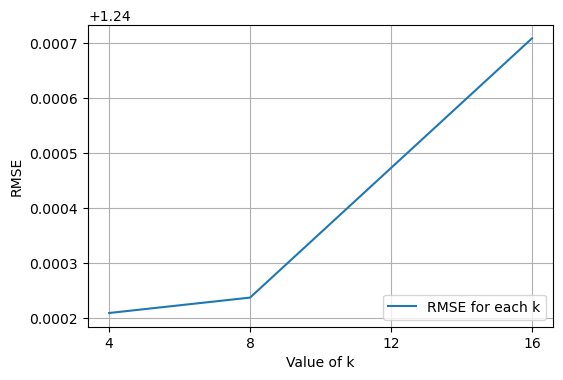

In [36]:
plt.figure(dpi=100)
x = [4, 8, 16]
y_bias = [RMSE_val_k4_bias, RMSE_val_k8_bias, RMSE_val_k16_bias]
plt.plot(x, y_bias, label='RMSE for each k')
plt.legend(loc='lower right')
plt.xlabel('Value of k')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))
plt.grid()
plt.show()

From the above results, it can be seen that when k=4, the validation data has the smallest RMSE on the model, so we pick k=4 to apply to the test data.  
Note: In several experiments, it was found that due to the existence of randomness, sometimes k=8 or k=16, the RMSE is the smallest, but most of the time, when k=4, the RMSE is the smallest. Therefore we still pick k=4 here.

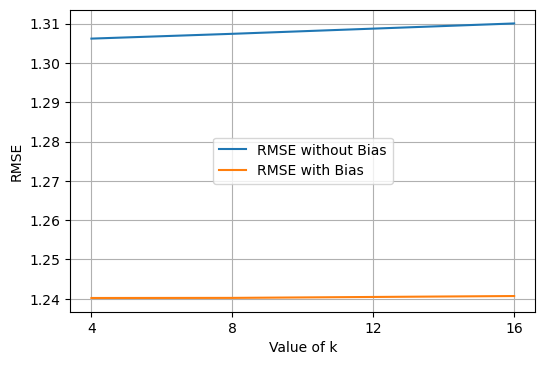

In [37]:
plt.figure(dpi=100)
x = [4, 8, 16]
y = [RMSE_val_k4, RMSE_val_k8, RMSE_val_k16]
y_bias = [RMSE_val_k4_bias, RMSE_val_k8_bias, RMSE_val_k16_bias]
plt.plot(x, y, label='RMSE without Bias')
plt.plot(x, y_bias, label='RMSE with Bias')
plt.legend(loc='center')
plt.xlabel('Value of k')
plt.ylabel('RMSE')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(4))
plt.grid()
plt.show()

From the above results, it can be seen that after incorporating the bias into the latent factor model, the RMSE decreased significantly.

### 5.4 Pick the best model and report its RMSE on the test data

In [38]:
df_test_predict = merge_dataframe(df_test)
# Check for NaN values
df_test_predict.isnull().sum()

business_id      0
user_id          0
stars            0
predict_k4     531
predict_k8     531
predict_k16    531
dtype: int64

In [39]:
df_test_predict = fill_nan(df_test_predict)
# Check for NaN values again
df_test_predict.isnull().sum()

business_id    0
user_id        0
stars          0
predict_k4     0
predict_k8     0
predict_k16    0
dtype: int64

In [40]:
# Calculate SSE
SSE_test_k4_bias = np.square(df_test_predict.stars - df_test_predict.predict_k4).sum()
# Calculate RMSE
RMSE_test_k4_bias = np.sqrt(SSE_test_k4_bias / 8582)
print("When k=4, the RMSE on the test data is:", RMSE_test_k4_bias)

When k=4, the RMSE on the test data is: 1.2260294402901892


In [41]:
RMSE_test_k4 - RMSE_test_k4_bias

0.060434669305997835

From the above results, it can be seen that after incorporating the bias into the latent factor model, the test RMSE is slightly reduced. It shows that adding bias has a positive impact on the prediction accuracy of the model.